# Support Vector Machine (SVM)

## [2024.04.07] 이상혁

### 개요
- Support Vector Machine(SVM)은 분류 성능이 뛰어나다고 알려져 있다.
- Logistic Regression과 같은 분류 모델은 조건부 확률을 추정해서 파라미터를 결정하지만, SVM은 최적화를 통해서 분류를 진행한다는 점이 특이하다.
- 실제로 다양한 딥러닝 모델들의 성능을 벤치마크할 때 SVM이 비교 모델로 등장하는 경우가 많다.
- SVM을 이해하기 위해 다음 4가지 과정을 살펴보면서 모델의 원리와 활용을 알아보려고 한다.

    1️⃣ Seperating Hyperplanes

    2️⃣ Maximal Margin Classifier
    
    3️⃣ Support Vector Classifier
    
    4️⃣ Support Vector Machine

### 1. Seperating Hyperplanes

#### 1-1. Hyperplane

SVM은 데이터를 분류하기 위해 **분류 경계**를 찾는다. 그리고 이 분류 경계를 **Hyperplane(초평면)**이라고 부른다. 데이터가 2차원이라면 초평면은 직선이 된다. 그리고 데이터가 3차원이라면 초평면은 면이 된다. 그리고 4차원 이상부터는 이 분류 경계를 초평면이라고 부르는 것이다. 일반적으로 <span style="background-color:#fff5b1"> p-차원의 초평면</span>은 다음과 같이 표현할 수 있다.

$$\beta_0 + \beta_1 X_1  + \beta_2 X_2 + \cdots + \beta_p X_p = 0 $$

이는 회귀식의 형태로 데이터를 바탕으로 최적의 회귀계수를 찾는 것이다.

그리고 초평면이 0이 되는 점을 기준으로 0 이상인 부분과 0 미만인 부분으로 분류를 진행하는 것이다.

예를 들어 4차원인 데이터가 있다고 하자. <span style="color:gray"> (변수가 4개라는 말이다.)</span> 그러면 분류 경계면은 다음과 같다. $$\beta_0 + \beta_1 X_1  + \beta_2 X_2 + \beta_3 X_3 + \beta_4 X_4 = 0$$

그리고 $x_i = (x_{i1}, x_{i2}, x_{i3}, x_{i4})^T$를 분류 경계면에 대입하여 0 기준으로 이상인지, 미만인지를 확인한다. 0을 기준으로 이상이면 1, 미만이면 -1로 데이터를 분류할 수 있게 된다. 

이처럼 초평면을 기준으로 데이터를 분류할 수 있다고 해서 Seperating Hyperplanes라고 부른다.

#### 1-2. Adavantages & Disadavantages

🤩 Adavantages 
1. 확률 추정이 없이 초평면이라는 분류 경계를 바탕으로 데이터를 쉽게 분류할 수 있다.

😱 Disadavantages 
1. 데이터가 seperable한 경우만 다룬다. 분류되는 데이터들 간에 overlapping이 있으면 분류를 할 수 없다.
2. 초평면은 유일하지 않다. 데이터를 바탕으로 회귀계수를 찾기 때문에 여러 개의 초평면이 존재할 수 있다. 이는 데이터가 seperable한 경우만 다뤄서 그렇다.

### 2. Maximal Margin Classifier

#### 2-1. How to Maximaize the Margin?

앞서 알아봤듯이 Hyperplanes만 사용해서 데이터를 분류하는 벙법은 분류 경계가 유일하지 않다는 단점이 있다. 이를 해결하기 위해 **Maximal Margin Classifier**라는 방법을 사용할 수 있다.

이는 <span style="background-color:#fff5b1"> Margin을 최대화하는 Hyperplane</span>을 찾는 것으로, Hyperplane에 제약조건이 생기기 때문에 😎**유일한 분류 경계**를 찾을 수 있게 된다. 그럼 Margin은 무엇일까?

**Margin**은 데이터와 초평면 사이에 수직으로 내린 거리 중 가장 최소의 거리를 말한다. 예를 들어 2차원 데이터를 생각해보자. 데이터를 잘 분류하는 초평면인 직선을 찾기 위해서는 다음의 2가지 조건을 생각하면 된다.

    1️⃣ 데이터에서 직선으로 수직으로 내린 선분의 거리가 가장 작은 직선을 찾는다.

    2️⃣ 이 선분의 길이가 가장 Maximize되는 직선(초평면)이 데이터를 가장 잘 분류하는 분류 경계가 된다.

이렇게 위 두 가지 조건을 바탕으로 최적화해 나가면서 찾은 초평면과 Margin은 데이터를 가장 잘 분류하는 경계라고 할 수 있다. 그리고 Margin을 최대화하는 분류 경계는 하나 뿐이기 때문에 분류 경계도 유일해진다.

#### 2-2. Support Vector

그리고 여기서 Support Vector라는 개념이 나오게 된다. 데이터에서 초평면에 수직으로 선분을 내리며 Margin의 크기를 정하게 된다면, 최종적으로 Margin을 설정하는데 직접적으로 영향을 준 데이터 포인트가 있을 것이다. 

이 데이터 포인트를 **Support Vector**라고 부른다. Support Vector는 Margin 위에 걸쳐있는 데이터 포인트라고 이해하면 쉬울 것 같다.

그리고 Maximal Margin Classifier의 분류 경계를 정하는 데에는 모든 Training 데이터가 필요하지는 않다. 왜냐하면 Support Vector만 Margin을 최적화하는데 영향을 주기 때문이다. 

그럼 이 분류 경계는 어떻게 추정하는가? 다음 수식을 보자.

$$ max_{\beta_0, \beta} M, \texttt{subject to} \ \beta^T \beta = 1 \ \texttt{and} \ y_i(\beta_0 + x_{i}^T\beta) \geq M $$

위 수식의 의미를 하나씩 생각해보자. 

▶ $M$은 Margin을 뜻한다. 이제 우리는 Margin을 최대화하는 분류 경계의 **회귀 계수**를 찾으면 된다. 

▶ $\beta^T \beta = 1$은 unique한 분류 경게를 찾기 위한 **제약 조건**이다.

▶ $y_i(\beta_0 + x_{i}^T\beta) \geq M$은 데이터로부터 초평면까지의 **수직 거리**를 의미한다. 각 데이터 포인트에 대한 해석을 거리로 만들어준 것이다. 이는 모든 데이터 포인트들의 거리가 $M$보다 크다는 것으로 Margin 상이나 Margin 밖에 데이터 포인트들이 존재한다는 것이다. <span style="color:gray"> (물론 여기서 Margin 위에 있는 데이터 포인트는 Support Vector인 점은 까먹지 말자.)</span>

#### 2-3. Adavantages & Disadavantages

🤩 Adavantages 
1. 거리를 바탕으로 초평면을 최적화하기 때문에 분류 경게가 유일하다.

😱 Disadavantages 
1. 여전히 데이터가 seperable한 경우만 다룬다. 분류되는 데이터들 간에 overlapping이 있으면 분류를 할 수 없다.
2. 즉, **Error**를 단 하나도 허용하지 않기 때문에 범용적인 분류 모델이 되기 어렵다. <span style="color:gray"> (Data-specific한 분류 경계가 될 가능성이 높다.)</span>

### 3. Support Vector Classifier

#### 3-1. How to Deal with Non-Seperable Data?

Seperating Hyperplanes 방법과 Maximal Margin Classifier는 모두 데이터가 seperable한 경우에만 사용할 수 있는 방법이다. 따라서 분류하고자 하는 클래스의 데이터가 중첩되어 있으면 분류를 할 수 없다는 단점이 있다. 이는 $M$이라는 Margin 밖으로만 데이터가 존재해야 하기 때문이다. 이를 해결하기 위해 <span style="background-color:#fff5b1"> 약간의 Error를 허용하는</span> **Support Vector Classifier**를 사용할 수 있다.

#### 3-2. Support Vector Classifier

Support Vector Classifier는 기본적으로 Maximal Margin Classifier와 동일하다. 그러나 하나의 차이가 있다면 Margin을 **Soft Margin**이라고 부르게 된다. Non-seperable한 경우까지 다루기 위해 약간의 Error를 허용하는 Margin인 것이다. 즉, 약간의 오분류를 허용하여 <span style="background-color:#fff5b1"> Margin 안에 분류되지 않는 Observations</span>가 있게 되는데 이를 통해서 과적합 문제를 방지할 수 있게 된다.

Soft Margin을 추정하는 식은 다음과 같다.
$$ max_{\beta_0, \beta} M, \texttt{subject to} \ \beta^T \beta = 1 \ \texttt{and} \ y_i(\beta_0 + x_{i}^T\beta) \geq M(1-\epsilon_i) \\ \ \texttt{where} \ \epsilon_i>0 \ \texttt{and} \ \sum_{i=1}^{n}\epsilon_i \leq C$$ 

여기서 $\epsilon_i$는 얼마나 다른 클래스의 Margin으로 넘어갔느냐를 나타내는 변수로 다음과 같이 정의할 수 있다.

$$ \epsilon_i = \begin{cases} 
0 & \text{if the $i$-th training observation is on the correct side of the margin}, \\
(0, 1) & \text{if the $i$-th training observation is on the wrong side of the margin}, \\
(1, ) & \text{if the $i$-th training observation is on the wrong side of the hyperplane}.
\end{cases} $$

또한 $C$는 오분류된 데이터의 개수를 조절하는 Hyper-parameter로, $C$를 줄이면 Hyperplane을 넘어간 obs.도 줄어들기 때문에 이를 위해 Margin도 줄어들게 된다. 오분류를 줄일 수 있다는 장점도 있지만, 데이터에 예민하게 반응하기 때문에 Bias는 낮아지고, Variance는 커지게 된다. $C$를 계속 줄이다가 0이되면 Maximal Margin Classifier가 된다. 

#### 3-3. Support Vector

Maximal Margin Classifier에서의 Support Vector는 Margin 위에 있는 데이터를 가르켰다. 그러나 Support Vector Classifier에서는 Margin을 넘어간 데이터가 존재한다. 따라서 <span style="background-color:#fff5b1"> Margin 위와 다른 클래스의 마진으로 넘어간 데이터</span>를 Support Vector라고 한다. 따라서 Support Vector만이 Hyperplane에 영향을 준다고 할 수 있다. 특히 $C$가 커질수록 Margin이 커지게 되어 Support Vector의 개수가 많아진다. 따라서 데이터가 많아짐에 따라 모델의 예민함도 줄어들어서 Variance가 작아진다.

### 4. Support Vector Machine(SVM)

#### 4-1. Then What is Support Vector Machine(SVM)?

위 3가지 과정을 이해했다면 SVM을 이해하는 것은 어렵지 않다. SVM은 Support Vector Classifier를 <span style="background-color:#fff5b1">비선형 결정 경계</span>로 확대한 모델이라고 할 수 있다. <span style="color:gray"> (결정 경계가 비선형이기 때문에 선형 결정 경계는 당연히 포함할 수 있을 것이다.)</span>

먼저 비선형한 데이터 Input을 선형으로 변환해준다.
$$ h(x_i) = (h_1(x_i), h_2(x_i), ..., h_M(x_i))^T $$

$h(\cdot)$은 Basis Function으로 Non-linear한 Input Space를 Linear한 Input으로 바꿔주는 함수이다. 따라서 SVM은 Non-linear한 Input Space를 선형으로 바꾼 Support Vector Classifier라고도 볼 수 있을 것 같다.

Margin을 추정하는 식은 다음과 같다.
$$ max_{\beta_0, \beta} M, \texttt{subject to} \ \beta^T \beta = 1 \ \texttt{and} \ y_i(\beta_0 + h(x_{i})^T\beta) \geq M(1-\epsilon_i) \\ \ \texttt{where} \ \epsilon_i>0 \ \texttt{and} \ \sum_{i=1}^{n}\epsilon_i \leq C$$

하지만 우리는 $h(\cdot)$를 알 수 없기 때문에 다음과 같이 SVM의 Margin을 계산하게 된다.
$$ \hat{f}(x) = \hat{\beta_0} + \sum_{i \in S} \hat{\alpha_i}<h(x), h(x_i)> $$

여기서 $<h(x), h(x_i)>$는 두 벡터 사이의 내적을 의미한다.

내적을 이용하게 되면 별도로 basis function을 모르더라도, 내적값이 어떤 **Kernel Function**을 따른다고 할 수 있다. Kernel Function $K(\cdot, \cdot)$은 다음과 같이 정의할 수 있다.
$$ K(x_i, x_{i'}) = <h(x), h(x_{i'})> $$

그리고 Kernel Function의 종류로는 Polynomial, Radial basis, Neural Network 등이 있다.

추가로 $C$의 의미와 역할은 Support Vector Classifier와 동일하다.

#### 4-2. Adavantages & Disadavantages

🤩 Adavantages 
1. Kernel Function을 사용하기 때문에 고차원 데이터에서 $\binom{n}{2}$개의 Pair를 사용해서 SVM을 계산할 수 있다.

### 5. Python Examples of SVM

#### 5-1. Libraries

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix, f1_score

import warnings
warnings.filterwarnings('ignore')

#### 5-2. Load Datasets

```sklearn.datasets```의 ```iris``` 데이터를 사용하겠습니다. ```sklearn.datasets```에는 여러 데이터셋이 있습니다. 다음의 목록을 참고하면 됩니다.
- ```load_boston```: 보스톤 집값 데이터
- ```load_iris```: 아이리스 붓꽃 데이터
- ```load_diabetes```: 당뇨병 환자 데이터
- ```load_digits```: 손글씨 데이터
- ```load_linnerud```: multi-output regression 용 데이터
- ```load_wine```: 와인 데이터
- ```load_breast_cancer:``` 위스콘신 유방암 환자 데이터

In [31]:
iris = load_iris()

```sklearn.datasets```의 내장 데이터는 ```sklearn.utils.Bunch```라는 자료구조를 갖고 있습니다. key와 value 형식으로 이루어져있으며, 공통적인 key는 다음과 같습니다.
- ```data```: 샘플 데이터, Numpy 배열로 이루어져 있습니다.
- ```target```: Label 데이터, Numpy 배열로 이루어져 있습니다.
- ```feature_names```: Feature 데이터의 이름
- ```target_names```: Label 데이터의 이름
- ```DESCR```: 데이터 셋의 설명
- ```filename```: 데이터 셋의 파일 저장 위치 (csv)

In [32]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [33]:
# X 변수 이름
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [34]:
# Y 변수 이름과 레이블 확인
print(iris['target_names'])
print(np.unique(iris['target'], return_counts = True))

['setosa' 'versicolor' 'virginica']
(array([0, 1, 2]), array([50, 50, 50], dtype=int64))


X 변수 4개에 Target은 3개입니다. 각 레이블마다 50개의 데이터가 있어서 클래스는 불균형 문제는 없습니다.

#### 5-3. Model Training and Prediction 

SVM 모델 학습을 위해 먼저 앞에서부터 2개의 변수만 활용해보겠습니다.

In [35]:
# 데이터와 레이블 정의
X = iris.data[:, :2]
y = iris.target

In [36]:
# 학습용, 평가용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.2)

In [37]:
# SVM 모델 정의
C = 1            
lin_SVM = svm.SVC(kernel = "linear", C=C)

# 모델 학습
lin_SVM.fit(X_train, y_train)

SVC(C=1, kernel='linear')

모델과 관련된 파라미터는 다음과 같습니다.
- 하이퍼파라미터인 $C$는 1로 설정했습니다. 원래는 Cross Validation 등으로 탐색해야 하지만 데이터셋의 크기도 작기 때문에 무난한 1로 설정했습니다.
- ```SVC```는 Classification, ```SVR```은 Regression입니다. 지금은 3개의 label을 분류해야 하기 때문에 ```SVC```를 사용합니다.
- 앞서 4-1절에서 SVM의 basis function에는 Polynomial, Radial basis, Neural Network 등이 있다고 했습니다. 여기서는 ```Linear```를 사용합니다.

🧐 SVC라는 이름에서도 알 수 있듯이 의 커널을 ```Linear```로 설정하면 Support Vector Classifier, 다른 비선형 커널을 설정하면 Support Vector Machine이라고 이해할 수 있습니다. 이어서 다른 커널 함수를 계속해서 사용해보겠습니다.

In [38]:
# 예측값 확인
y_pred_lin = lin_SVM.predict(X_test)

In [39]:
# Confusion Matrix 확인
confusion_matrix(y_test, y_pred_lin)    

array([[13,  0,  0],
       [ 0,  6,  0],
       [ 0,  4,  7]], dtype=int64)

In [40]:
# f1 score 확인
f1_score(y_test, y_pred_lin, average='macro')  

0.8425925925925926

test 결과 4개의 오분류만 존재하고 모두 잘 분류하고 있습니다.

#### 5-4. Another Basis Function

이번에는 Basis Function을 Radial basis로 바꿔서 학습 및 예측을 진행해보겠습니다.

In [41]:
# 모델 정의
rbf_SVM = svm.SVC(kernel = 'rbf', gamma = 0.7, C=C, max_iter = 10000) 

모델과 관련된 파라미터는 다음과 같습니다.
- Radial Basis Function은 gamma라는 하이퍼파라미터가 있습니다.

In [42]:
# 모델 학습
rbf_SVM.fit(X_train, y_train)

SVC(C=1, gamma=0.7, max_iter=10000)

In [43]:
# 예측값 확인
y_pred_rbf = rbf_SVM.predict(X_test)

In [44]:
# Confusion Matrix 확인
cm = confusion_matrix(y_test, y_pred_rbf)
# f1 score
f1 = f1_score(y_test, y_pred_rbf, average='macro')

print(cm)
print(f1)

[[13  0  0]
 [ 0  6  0]
 [ 0  4  7]]
0.8425925925925926


음... 결과가 Linear인 경우와 정확히 같습니다.

이번에는 Polynomial Basis Function을 사용해보겠습니다. 파라미터의 ```degree```는 차수를 의미합니다.

In [45]:
# 모델 정의
poly_SVM = svm.SVC(kernel = 'poly', degree = 3, gamma = 'auto', C=C, max_iter = 10000)

# 모델 학습
poly_SVM.fit(X_train, y_train)

# 예측값 확인
y_pred_poly = rbf_SVM.predict(X_test)

# Confusion Matrix 확인
cm = confusion_matrix(y_test, y_pred_poly)
# f1 score
f1 = f1_score(y_test, y_pred_poly, average='macro')

print(cm)
print(f1)

[[13  0  0]
 [ 0  6  0]
 [ 0  4  7]]
0.8425925925925926


#### 5-5. Visualize the result

전체 데이터를 바탕으로 각각의 SVM 모델을 학습시킨 결과를 시각화하여 결정 결계를 확인해보자.

In [46]:
# 함수 정의
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [47]:
# 데이터 로드하기
iris = load_iris()

X = iris.data[:, :2]
y = iris.target

# 모델 정의&피팅
C = 1.0
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in models)

In [48]:
# plot title 형성
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

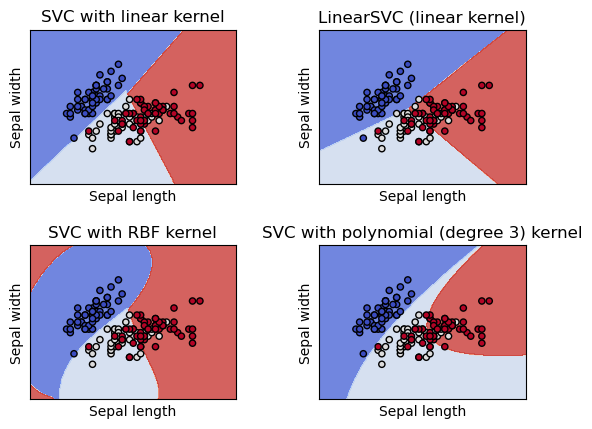

In [49]:
# plot 그리기
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

Plot을 보면 알 수 있듯이, 각 모델마다 결정경계가 다르다. 그래도 확인할 수 있는 것은 Linear한 모델(Support Vector Classifier)의 결정경계는 모두 직선이고, 비선형 모델(Support Vector Machine)의 경우, 비선형 결정경계를 보여준다. 

이렇게 SVM의 발전과 이론, 그리고 코드를 알아봤다. 시간은 오래 걸리지만 분류 성능이 워낙 좋기 때문에 앞으로 다양한 Task에서 사용해봐야겠습니다.

### 6. Reference

SMV 이론
- 김재직 교수님 통계적데이터마이닝(STA3014-01) 교안
- https://m.blog.naver.com/jaehong7719/221928401297

코드
- https://todayisbetterthanyesterday.tistory.com/32
- https://teddylee777.github.io/scikit-learn/scikit-learn-dataset/

기타
- https://kr.piliapp.com/emoji/list/